# Credit Decisor

## Setup

In [1]:
filename = 'photo.jpg'

In [2]:
%run helper.py

In [3]:
%matplotlib inline

## Informações do Cliente

In [22]:
nome = "Lennon Alves Dias" #@param {type:"string"}
renda = 3000.00 #@param {type:"number"}
idade = 25 #@param {type:"slider", min:18, max:100, step:1}
etnia = 0  #@param {type:"number"}
genero = 0 #@param {type:"number"}
casa_propria = 1 #@param {type:"number"}
outras_rendas = 0 #@param {type:"number"}
estado_civil = 1 #@param {type:"number"}
escolaridade = 2 #@param {type:"number"}

In [23]:
person_client = {
  'nome': {'1': nome},
  'renda': {'1': renda},
  'idade': {'1': idade},
  'etnia': {'1': etnia},
  'sexo': {'1': genero},
  'casapropria': {'1': casa_propria},
  'outrasrendas': {'1': outras_rendas},
  'estadocivil': {'1': estado_civil},
  'escolaridade': {'1': escolaridade}
}

In [6]:
take_photo()

## Análise de Crédito

In [7]:
import json
import requests

In [8]:
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [9]:
authenticator = IAMAuthenticator(IBM_WATSON_API_KEY)
visual_recognition = VisualRecognitionV3(version="2020-04-29", authenticator=authenticator)
visual_recognition.set_service_url(IBM_WATSON_URL)

In [10]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials

In [11]:
face_client = FaceClient(AZURE_URL, CognitiveServicesCredentials(AZURE_API_KEY))

In [12]:
def validate_person(image):
  general_data = visual_recognition.classify(images_file=image, threshold=0.6, classifier_ids='default').get_result()
  general_classes = general_data['images'][0]['classifiers'][0]['classes']
  is_person = any(x['class'] == "person" for x in general_classes)
  return True if is_person else False

In [13]:
def validate_explicit(image):
  explicit_data = visual_recognition.classify(images_file=image, threshold=0.75, classifier_ids='explicit').get_result()
  explicit_classes = explicit_data['images'][0]['classifiers'][0]['classes']
  is_explicit = any(x['class'] == "explicit" for x in explicit_classes)
  return True if is_explicit else False

In [14]:
PREDICT_URL = 'https://creditdecisor.lennon.cloud'
PREDICT_HEADERS = {'Content-Type': 'application/json'}

In [25]:
def predict_model(num, client):
    response = requests.request("POST", f'{PREDICT_URL}/modelo{num}', headers=PREDICT_HEADERS, json=client, verify=False)
    return response.json()

E uma pessoa: True
Imagem explicita: False
(28.0, <Gender.male: 'male'>)
Score Modelo 01: {'prediction': [0], 'proba': [[0.91, 0.09]]}
Score Modelo 02: {'prediction': [0.54]}


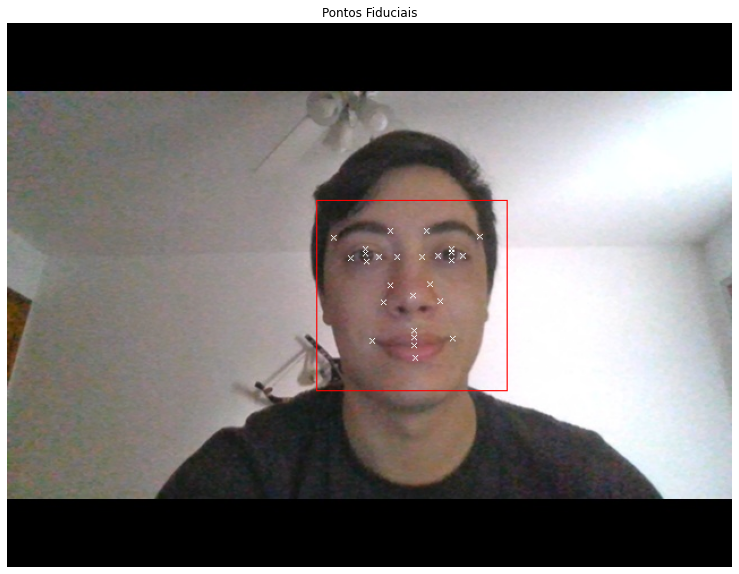

In [26]:
try:
  with open(filename, 'r+b') as image:
    print(f'E uma pessoa: {validate_person(image)}')
  with open(filename, 'r+b') as image:
    print(f'Imagem explicita: {validate_explicit(image)}')
  with open(filename, 'r+b') as image:
    print(facial_recognition(face_client, image))
  print(f'Score Modelo 01: {predict_model("01", person_client)}')
  print(f'Score Modelo 02: {predict_model("02", person_client)}')
except Exception as err:
  print(str(err))